In [32]:
import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt

In [33]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
basedir = '/content/drive/MyDrive/Dissertation/Datasets'

In [35]:
def load_csv(basedir):
  return pd.read_csv(os.path.join(basedir, 'Spooner et al. (2020).csv'))

In [36]:
df = load_csv('/content/drive/MyDrive/Dissertation/Datasets')

In [37]:
df

year  T quinqueloba [%]  lower bound 95%  upper bound 95%
0    2013.29             8.7536           5.8930          12.8137
1    2011.88             5.2083           2.8427           9.3531
2    2010.13             3.5044           2.0956           5.8042
3    2008.10             2.1918           1.1123           4.2737
4    2005.98             2.1390           1.0855           4.1721
..       ...                ...              ...              ...
109   606.05            40.5694          34.9696          46.4257
110   552.49            46.1358          41.4499          50.8910
111   498.99            35.5634          31.7277          39.5938
112   445.59            43.4505          39.6117          47.3694
113   392.35            40.5797          36.5535          44.7367

[114 rows x 4 columns]

In [38]:
df.shape

(114, 4)

In [39]:
df.head()

year  T quinqueloba [%]  lower bound 95%  upper bound 95%
0  2013.29             8.7536           5.8930          12.8137
1  2011.88             5.2083           2.8427           9.3531
2  2010.13             3.5044           2.0956           5.8042
3  2008.10             2.1918           1.1123           4.2737
4  2005.98             2.1390           1.0855           4.1721

In [40]:
df.tail()

year  T quinqueloba [%]  lower bound 95%  upper bound 95%
109  606.05            40.5694          34.9696          46.4257
110  552.49            46.1358          41.4499          50.8910
111  498.99            35.5634          31.7277          39.5938
112  445.59            43.4505          39.6117          47.3694
113  392.35            40.5797          36.5535          44.7367

In [41]:
pip install plotnine

In [42]:
from pandas.api.types import CategoricalDtype
from plotnine import *
from plotnine.data import mpg
%matplotlib inline

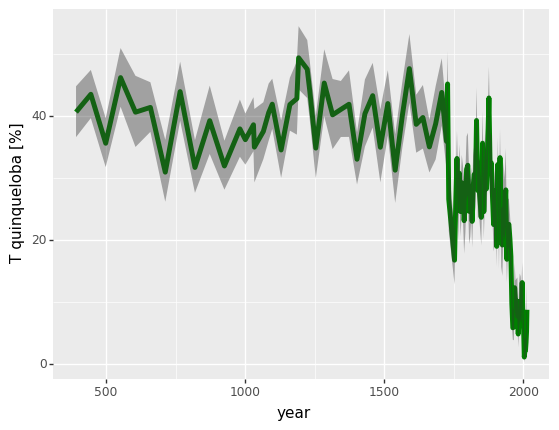

<ggplot: (8733476756073)>

In [43]:
(
    ggplot(df)  
    + aes(x="year", y="T quinqueloba [%]")  
    + geom_line(colour = 'green', size = 2) 
    + geom_ribbon(aes(ymax = "lower bound 95%",ymin = "upper bound 95%"),alpha = 0.4)
)

In [44]:
new = df.dropna()

In [45]:
o = len(df.axes[0])
n = len(new.axes[0])
print(f"Deleted Rows= {o-n}")

Deleted Rows= 0


In [46]:
column = []
for col in new.columns:
    column.append(col)

In [47]:
for i in column:
  mean = np.mean(df[i])
  print(f"Mean of {i} = {mean}")

Mean of year = 1618.3327192982458
Mean of T quinqueloba [%] = 28.37127631578948
Mean of lower bound 95% = 24.19723596491228
Mean of upper bound 95% = 33.058729824561404


In [48]:
for i in column:
  median = np.median(df[i])
  print(f"Median of {i} = {median}")

Median of year = 1803.1599999999999
Median of T quinqueloba [%] = 30.6571
Median of lower bound 95% = 25.88615
Median of upper bound 95% = 35.29075


In [49]:
from scipy import stats
for i in column:
  mode = stats.mode(df[i])
  print(f"Mode of {i} = {mode[0][0]}")

Mode of year = 392.35
Mode of T quinqueloba [%] = 1.1364
Mode of lower bound 95% = 0.3097
Mode of upper bound 95% = 4.0788


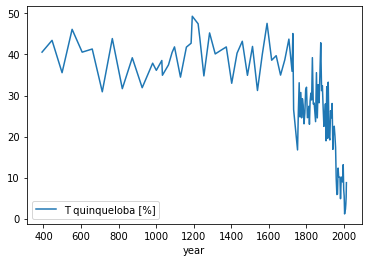

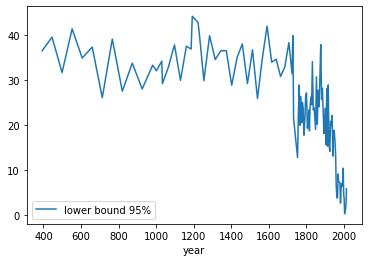

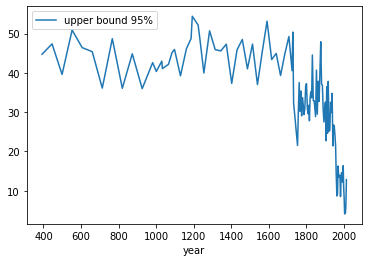

In [50]:
d = 0
for i in column:
  if i != 'year':
    fig = df.plot(x="year", y=[i])
    d = d + 1

In [51]:
!sudo apt-get install jags
!pip install pyjags

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  jags
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 1,562 kB of archives.
After this operation, 3,522 kB of additional disk space will be used.
Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ jags 4.3.0-3bionic0 [1,562 kB]
Fetched 1,562 kB in 2s (768 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package jags.
(Reading database ... 155222 files and directories curren

In [52]:
import pyjags

In [53]:
pyjags

<module 'pyjags' from '/usr/local/lib/python3.7/dist-packages/pyjags/__init__.py'>

In [54]:
plt.style.use('ggplot')

In [56]:
N = len('year')
alpha = len('T quinqueloba [%]')
beta = len('lower bound 95%')
sigma = len('upper bound 95%')

In [57]:
# Generate x uniformly
x = np.random.uniform(0, 100, size=N)
# Generate y as alpha + beta * x + Gaussian error term
y = np.random.normal(alpha + x*beta, sigma, size=N)

In [58]:
# JAGS model code
code = '''
model {
    for (i in 1:N) {
        y[i] ~ dnorm(alpha + beta * x[i], tau)
    }
    alpha ~ dnorm(0.0, 1.0E-4)
    beta ~ dnorm(0.0, 1.0E-4)
    sigma <- 1.0/sqrt(tau)
    tau ~ dgamma(1.0E-3, 1.0E-3)
}
'''

In [59]:
# Load additional JAGS module
pyjags.load_module('glm')

In [60]:
# Initialize model with 4 chains and run 1000 adaptation steps in each chain.
# We treat alpha, beta and sigma as parameters we would like to infer, based
# on observed values of x and y.
model = pyjags.Model(code, data=dict(x=x, y=y, N=N), chains=4, adapt=1000)
 
# 500 warmup / burn-in iterations, not used for inference.
model.sample(500, vars=[])
 
# Run model for 1000 steps, monitoring alpha, beta and sigma variables.
# Returns a dictionary with numpy array for each monitored variable.
# Shapes of returned arrays are (... shape of variable ..., iterations, chains).
# In our example it would be simply (1, 1000, 4).
samples = model.sample(1000, vars=['alpha', 'beta', 'sigma'])

sampling: iterations 2000 of 2000, elapsed 0:00:00, remaining 0:00:00
sampling: iterations 4000 of 4000, elapsed 0:00:00, remaining 0:00:00


In [61]:
# Use pandas three dimensional Panel to represent the trace:
#x = pd.DataFrame({k: v.squeeze(0) for k, v in samples.items()})
trace = pd.Panel({k: v.squeeze(0) for k, v in samples.items()})
#trace.axes[0].name = 'Variable'
##trace.axes[1].name = 'Iteration'
#trace.axes[2].name = 'Chain'
return trace

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  This is separate from the ipykernel package so we can avoid doing imports until


TypeError: ignored

In [62]:
x = {k: v.squeeze(0) for k, v in samples.items()}

In [63]:
x

{'alpha': array([[  9.53194366, -89.6621683 ,  -6.66315317,  16.75209557],
        [  1.36968993, -59.30344954,  30.11820624,   1.11098186],
        [ 14.41362648,  55.9364802 ,   4.73518206,   9.32631826],
        ...,
        [ 21.91380976, -18.85231684,   1.38822552,  44.13552318],
        [-11.91661802, -69.13105519,  14.33318158,  51.47559887],
        [-14.98379035, -39.50751387,  24.39905425, -24.19333275]]),
 'beta': array([[15.10174484, 16.58726916, 15.03954555, 15.00864173],
        [15.14062777, 14.12327485, 14.90431381, 15.08907789],
        [14.86682358, 13.99606607, 15.21603031, 14.92998363],
        ...,
        [15.53832119, 15.3058668 , 15.02829225, 14.68731682],
        [15.10476603, 15.91835036, 14.86126475, 14.66054732],
        [15.32579908, 15.64734326, 15.01299245, 15.24937333]]),
 'sigma': array([[ 10.88833711, 105.63555216,  16.07313549,  42.2984962 ],
        [ 11.26238709,  90.40547203,  19.68522324,  11.57127948],
        [ 17.25103903,  56.38112995,  12.181

In [ ]:
# Point estimates:
print(trace.to_frame().mean())
 
# Possible output:
# Variable
# alpha 71.693096
# beta 19.860774
# sigma 49.790683

In [ ]:
# Bayesian equal-tailed 95% credible intervals:
print(trace.to_frame().quantile([0.05, 0.95]))
 
# Possible output:
# Variable alpha beta sigma
# 0.05 61.98259 19.694937 46.472748
# 0.95 81.27412 20.025410 53.284573

In [ ]:
def plot(trace, var):
    fig, axes = plt.subplots(1, 3, figsize=(9, 3))
    fig.suptitle(var, fontsize='xx-large')
 
    # Marginal posterior density estimate:
    trace[var].plot.density(ax=axes[0])
    axes[0].set_xlabel('Parameter value')
    axes[0].locator_params(tight=True)
     # Autocorrelation for each chain:
    axes[1].set_xlim(0, 100)
    for chain in trace[var].columns:
        autocorrelation_plot(trace[var,:,chain], axes[1], label=chain)
 
    # Trace plot:
    axes[2].set_ylabel('Parameter value')
    trace[var].plot(ax=axes[2])
 
    # Save figure
    plt.tight_layout()
    fig.savefig('{}.png'.format(var))
 
# Display diagnostic plots
for var in trace:
    plot(trace, var)
 
# Scatter matrix plot:
scatter_matrix(trace.to_frame(), diagonal='density')
plt.savefig('scatter_matrix.png')